This is the notebook of the code for Group 2's final project on the IBM Telco Customer Churn dataset. We utilized a human-centered data science process in cleaning, exporing, and modeling the data provided.

In [ ]:
#Importing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Once the packages that are needed for exploration are imported, we can import the dataset and take a quick look.

In [ ]:
url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
telco_df = pd.read_csv(url)
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


For the data cleaning process, we mainly want to change yes/no strings into 1 and 0 in the entire table. Note that this isn't the most efficient or robust solution but it should do for converting the strings into boolean-like numerical values. The following code is the mapping for the variables, which could be made more generalizable for other datasets but for now is functional enough for our needs.

In [ ]:
telco_df.Partner = telco_df.Partner.map({"Yes":1,"No":0})
telco_df.Dependents = telco_df.Dependents.map({"Yes":1,"No":0})
telco_df.PhoneService = telco_df.PhoneService.map({"Yes":1,"No":0})
telco_df.OnlineSecurity = telco_df.OnlineSecurity.map({"Yes":1,"No":0})
telco_df.OnlineBackup = telco_df.OnlineBackup.map({"Yes":1,"No":0})
telco_df.DeviceProtection = telco_df.DeviceProtection.map({"Yes":1,"No":0})
telco_df.TechSupport = telco_df.TechSupport.map({"Yes":1,"No":0})
telco_df.StreamingTV = telco_df.StreamingTV.map({"Yes":1,"No":0})
telco_df.StreamingMovies = telco_df.StreamingMovies.map({"Yes":1,"No":0})
telco_df.PaperlessBilling = telco_df.PaperlessBilling.map({"Yes":1,"No":0})
telco_df.Churn = telco_df.Churn.map({"Yes":1,"No":0})
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1.0,...,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1.0,...,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0.0,...,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


Here, we will be exploring the dataset in relation to churn. We will first examine the percent of each gender that does churn.

26.920871559633024
26.160337552742618


Text(0.5, 1.0, 'Churn Percentages by Gender')

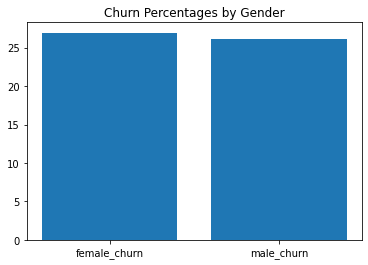

In [ ]:
#Finding total counts of each gender
gender_counts = telco_df['gender'].value_counts()
female_total = gender_counts['Female']
male_total = gender_counts['Male']

#Finding female churn percentage
female_df = telco_df[telco_df['gender'] == "Female"]
female_churn_count = len(female_df[female_df['Churn'] == True])
female_churn_percentage = (female_churn_count/female_total)  * 100
print(female_churn_percentage)

#Finding male churn percentage
male_df = telco_df[telco_df['gender'] == "Male"]
male_churn_count = len(male_df[male_df['Churn'] == True])
male_churn_percentage = (male_churn_count/male_total)  * 100
print(male_churn_percentage)

gender_churn = {'female_churn': female_churn_percentage, 'male_churn': male_churn_percentage}
plt.bar(gender_churn.keys(), gender_churn.values())
plt.title('Churn Percentages by Gender')

Ultimately, looks like the gender itself doesn't play a big role in creating churn. However, there may be other factors that play a bigger part. While we could go through and compare summary statistics for every variable in the table, that would be slightly intensive. Rather, we can try to get a cursory look at the entire dataset through looking at linear correlation.

We'll be creating a correlation matrix to try and more easily see if there are any relationships between a factor and churn. The `.corr` function returns Pearson's r coefficient by default, which indicates linear correlation. While this might not be the exact relationship between each of the variables, it's a quick and easy way to see if there is any sort of relationship between these variables.

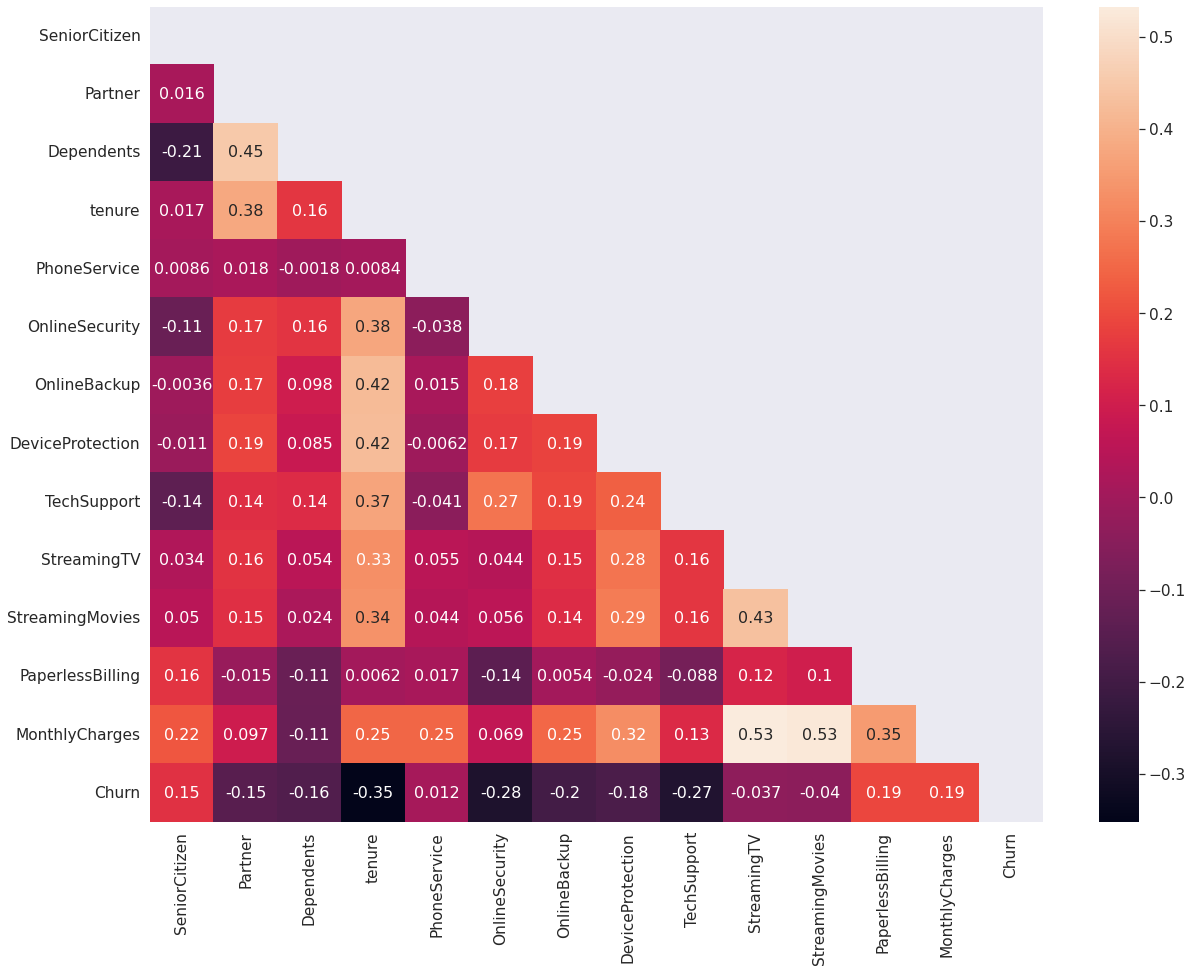

In [ ]:
corr = telco_df.corr()

matrix = np.triu(corr)
plt.subplots(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, mask=matrix, annot_kws={"size": 16})


Unfortunately this only works for the current numerical variables. If we wanted to look at every variable we would have to make the strings into categorical variables. There are some ways to do this, like splitting each categorical variable into columns with binary values, but that also may create an excess amount of columns as a side effect. As is, there still are some interesting implications although the r values are weak. Tenure seems to be negatively correlated with Churn the strongest in the matrix. A possible logical explanation for this is that the longer a person stays the less likely they are to churn.

Tenure also happens to be positively correlated with the other services that the company offers. This follows the same line of logic where long time customers will purchase more services.

Next, we're going to be creating a model to try and predict whether or not a customer will churn given the variables seen above. Since we're trying to predict whether or not a customer will churn which is a binary variable, logistic regression will be a good tool.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Select variables that can be used, same ones that appear in the correlation matrix. Drop NaNs
model_df = telco_df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'Churn']]
model_df = model_df.dropna()

data = model_df.iloc[:, :13]
target = model_df.iloc[:, 13]

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 123)

model = LogisticRegression()

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

model.score(X_test,y_test)

0.779891304347826

Next, we'll evaluate the model using precision and recall along with the initial accuracy score.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted))
print("Precision:",metrics.precision_score(y_test, y_predicted))
print("Recall:",metrics.recall_score(y_test, y_predicted))

Accuracy: 0.779891304347826
Precision: 0.6508474576271186
Recall: 0.5783132530120482


Although the scores aren't great, it still indicates a functional model on the dataset that can be further tweaked and optimized in the future. Better feature selection can try to curb down on potential overfitting by selecting only the most impactful variables, and the model can be tuned to maximize recall or precision depending on the user's needs.

However, it should always be kept in mind the context of the dataset matters when trying to interpret it. As a result, this model wouldn't be immediately generalizable to all datasets without thinking about the background of the data.